In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/train_datathon_cleaned_final.csv")


In [ ]:
test=pd.read_csv("/content/test_datathon_cleaned_final.csv")

In [ ]:
df.shape

(40512, 36)

In [ ]:
df.isna().sum()

,0
Yearly Income,0
Gross Weight,0
Net Weight,0
Is Recyclable?,0
Promotion Name,0
Store Kind,0
Store Sales,0
Store Cost,0
Grocery Area,0
Frozen Area,0


In [ ]:
test.isna().sum()

,0
Promotion Name,0
Store Kind,0
Store Sales,0
Store Cost,0
Gross Weight,0
Net Weight,0
Is Recyclable?,0
Yearly Income,0
Store Area,0
Grocery Area,0


In [ ]:
test.shape

(19942, 35)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Yearly Income,40512.0,46432.372630,36186.960255,1440.000000,25000.000000,30000.000000,70000.000000,150000.000000
Gross Weight,40512.0,631.099611,3599.578703,4.433500,14.681300,20.495700,26.164700,31833.700000
Net Weight,40512.0,35.491956,567.120237,3.990150,11.468800,16.716300,22.094600,27909.000000
Store Sales,40512.0,6.446511,3.428440,0.400000,3.750000,5.860000,8.550000,19.900000
Store Cost,40512.0,2.612928,1.447015,0.163200,1.499175,2.376000,3.474975,9.504000
Grocery Area,40512.0,1771.900231,359.900064,1233.080000,1508.000000,1734.500000,2049.720000,8103.200000
Frozen Area,40512.0,492.297955,141.230729,227.800000,440.920000,470.270000,523.320000,1783.640000
Meat Area,40512.0,327.853603,93.843277,149.900000,293.950000,313.550000,349.280000,570.740000
Cost,40512.0,533.889922,261.765134,-1.000000,364.269500,515.259600,662.222600,4307.560000
Customer Latitude,40512.0,21.152581,5.659736,0.004617,20.102593,22.925733,23.587598,41.146203


In [ ]:
#To compute outliers in each row
outliers_summary = {}
n_cols = df.select_dtypes(include='number').columns.tolist()
for col in n_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = (df[col] < lower_bound) | (df[col] > upper_bound)

    outliers_summary[col] = mask.sum()

for col, count in outliers_summary.items():
    print(f"{col} => no of anomalies values: {count}")

Yearly Income => no of anomalies values: 767
Gross Weight => no of anomalies values: 1672
Net Weight => no of anomalies values: 86
Store Sales => no of anomalies values: 335
Store Cost => no of anomalies values: 653
Grocery Area => no of anomalies values: 2
Frozen Area => no of anomalies values: 9752
Meat Area => no of anomalies values: 9720
Cost => no of anomalies values: 274
Customer Latitude => no of anomalies values: 6714
Customer Longitude => no of anomalies values: 1760
Seller Latitude => no of anomalies values: 4009
Seller Longitude => no of anomalies values: 3826
Review Score => no of anomalies values: 6019
Store Area => no of anomalies values: 4
Children => no of anomalies values: 0
Feature_bar for salad => no of anomalies values: 0
Feature_coffee bar => no of anomalies values: 0
Feature_florist => no of anomalies values: 0
Feature_ready food => no of anomalies values: 0
Feature_video store => no of anomalies values: 0


In [ ]:
skew_df = df.skew(numeric_only=True).sort_values(ascending=False).reset_index()
skew_df.columns = ["Column", "Skewness"]

skew_df

,Column,Skewness
0,Net Weight,35.221294
1,Cost,7.048686
2,Gross Weight,6.337647
3,Yearly Income,1.123546
4,Store Cost,0.821998
5,Store Sales,0.687767
6,Frozen Area,0.616783
7,Feature_video store,0.609195
8,Meat Area,0.601871
9,Grocery Area,0.600565


# **Data analysis**

In [ ]:
df_copy=df.copy()

In [ ]:


num_cols=df_copy.select_dtypes(include=np.number).columns.tolist()
num_cols



['Yearly Income',
 'Gross Weight',
 'Net Weight',
 'Store Sales',
 'Store Cost',
 'Grocery Area',
 'Frozen Area',
 'Meat Area',
 'Cost',
 'Customer Latitude',
 'Customer Longitude',
 'Seller Latitude',
 'Seller Longitude',
 'Review Score',
 'Store Area',
 'Children',
 'Feature_bar for salad',
 'Feature_coffee bar',
 'Feature_florist',
 'Feature_ready food',
 'Feature_video store']

In [ ]:
cat_cols=df_copy.select_dtypes(include='object').columns.tolist()
cat_cols

['Is Recyclable?',
 'Promotion Name',
 'Store Kind',
 'Customer City',
 'Customer State',
 'Seller City',
 'Seller State',
 'Marital_Status',
 'Gender',
 'Education',
 'Occupation',
 'Product_Type',
 'Order_Department',
 'Ordered_Brand',
 'Income_Bin']

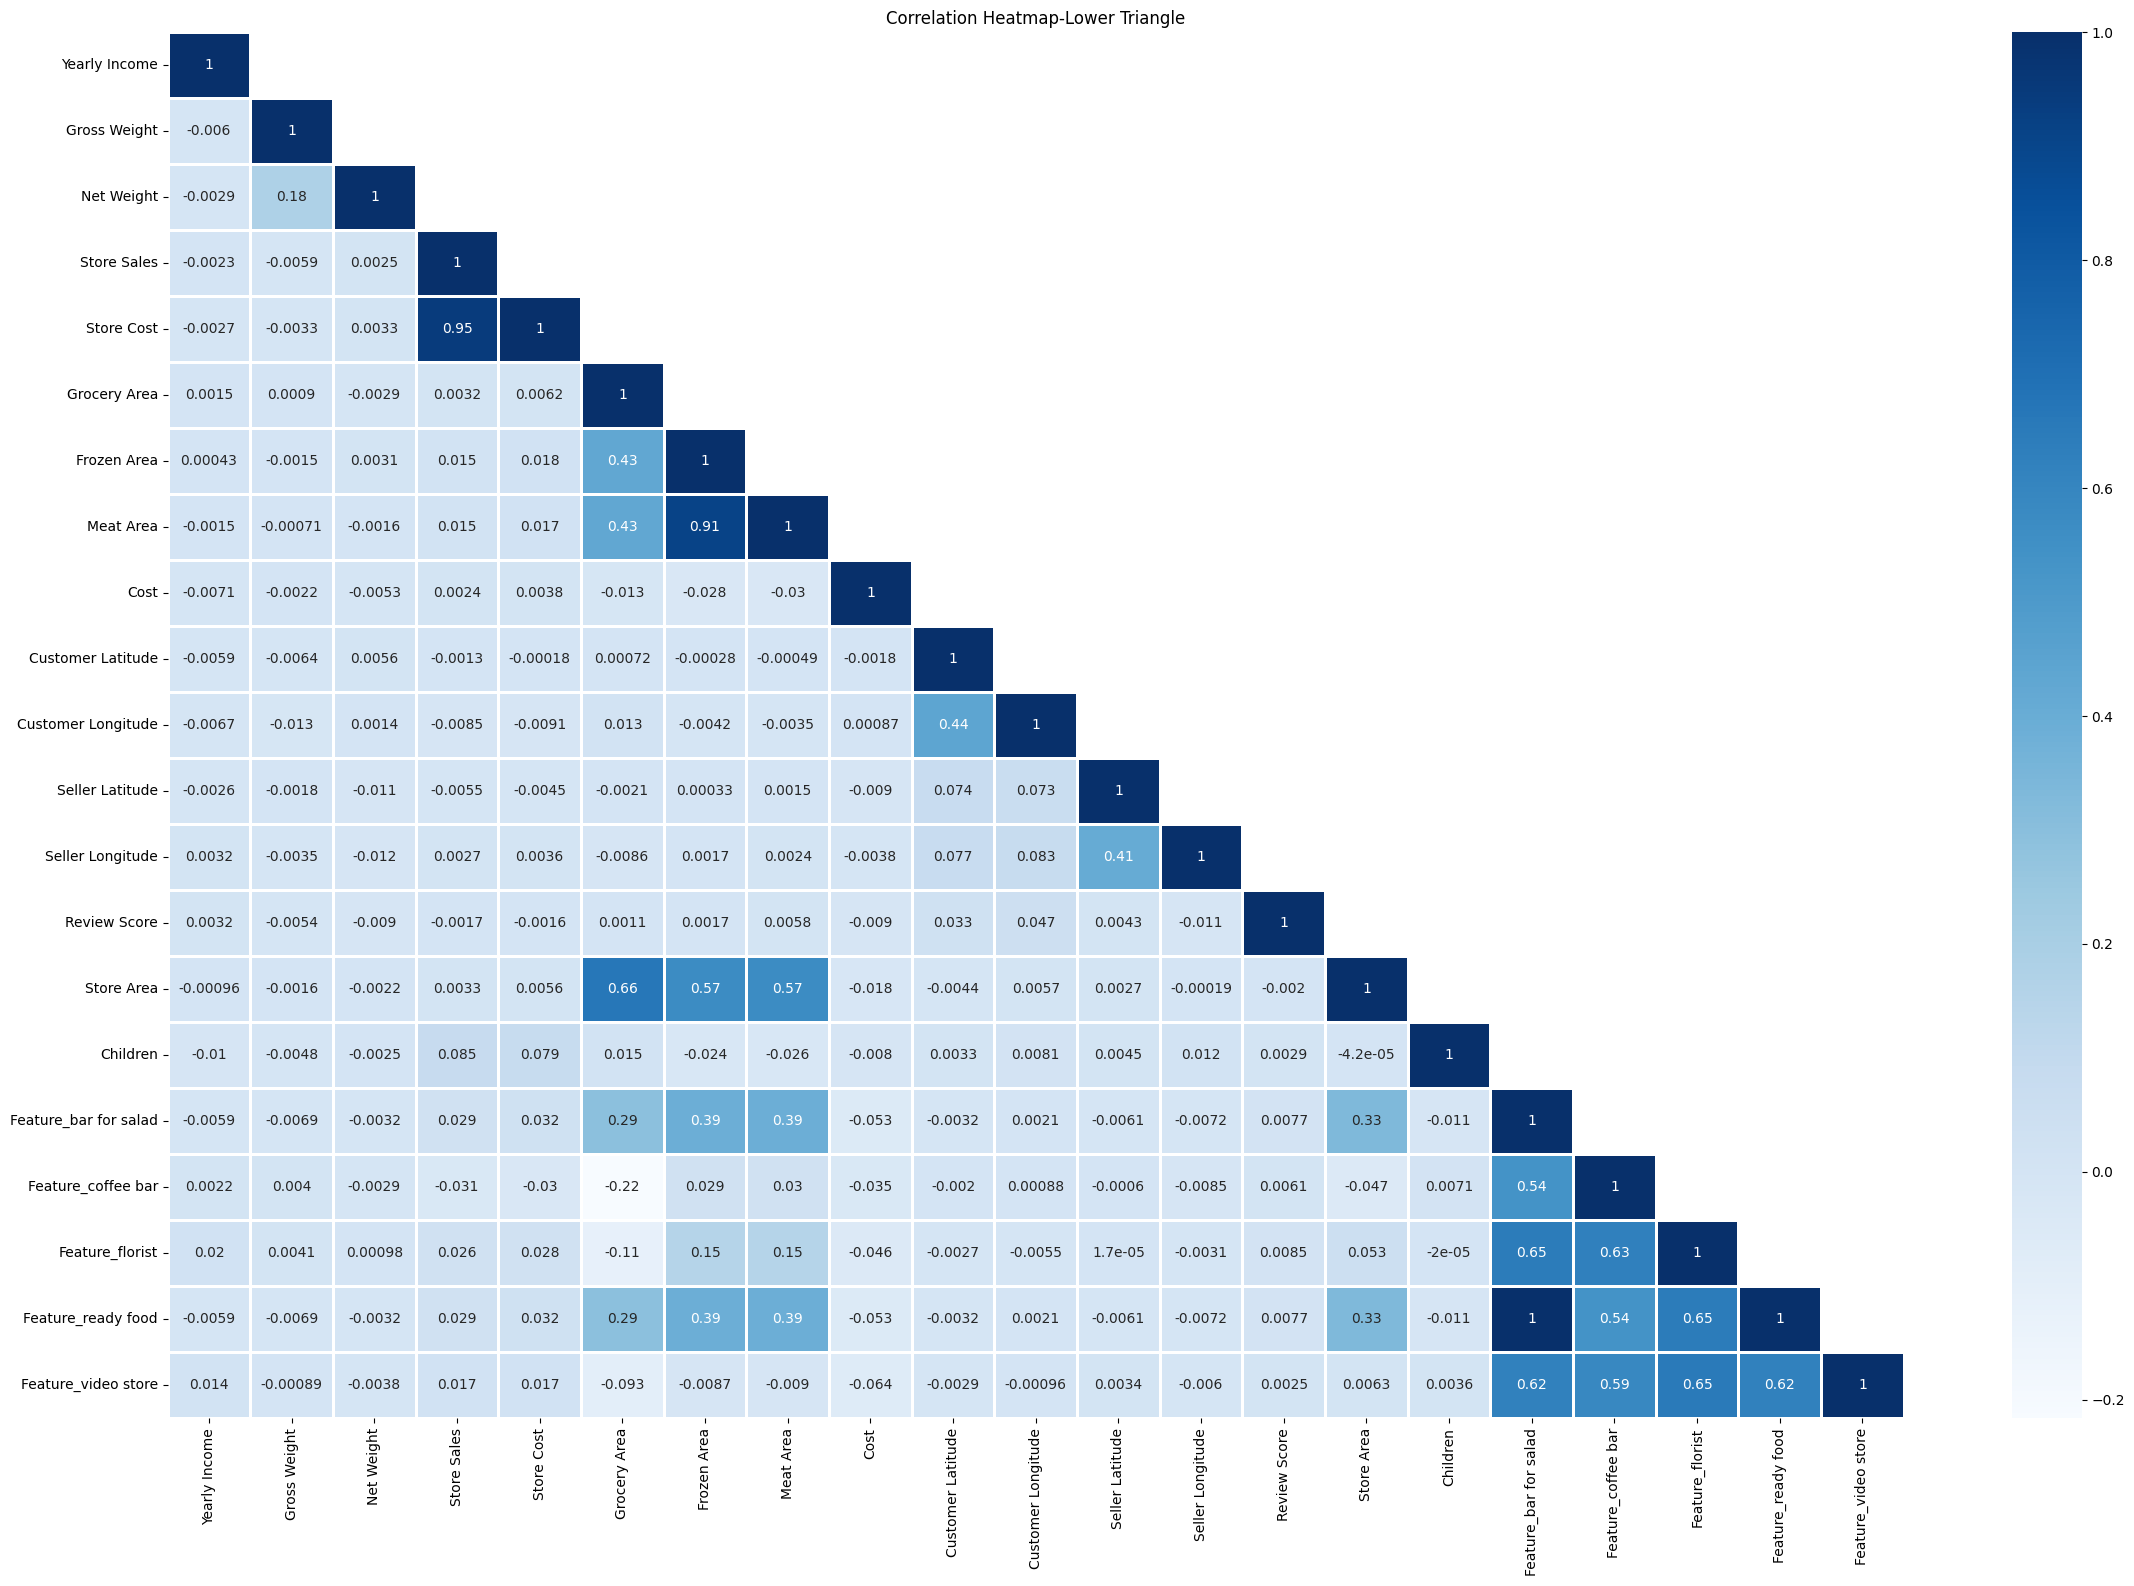

In [ ]:

corr = df_copy.corr(numeric_only=True)
plt.figure(figsize=(28, 18))
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
sns.heatmap(corr, mask=mask, annot=True, linewidths=1, linecolor="white",cmap='Blues')
plt.title("Correlation Heatmap-Lower Triangle")
plt.show()

In [ ]:
for col in cat_cols:

    print(col,":",df_copy[col].unique())

    print('-'*40)

Is Recyclable? : ['Yes' 'No']
----------------------------------------
Promotion Name : ['Dimes Off' 'Budget Bargains' 'Shelf Emptiers' 'Savings Galore'
 'Sale Winners' 'Weekend Discount' 'Price Winners' 'Shelf Clearing Days'
 'Big Time Discounts' 'Lottery Cash Registerion' 'Pick Your Savings'
 'One Day Sale' 'Super Savers' 'Two Day Sale' 'Sale Sale Sale'
 'Wallet Savers' 'Money Savers' 'Save Price' 'Best Savings'
 'Big Time Saving' 'Bag Stuffer' 'Save It' 'Dollar Days' 'Discount Frenzy'
 'Sales Days' 'Sale : Double Down' 'Coupon Spectacular' 'Three for One'
 'Super Duper Savers' 'GLD' 'Go For It' 'Mystery Sale'
 'I Cant Believe It Sale' 'You Save Days' 'Double Your Savings'
 'Full Free' 'Saving Days' 'Roller Savings' 'Green Light Special'
 'Price Slashers' 'Price Cutters' 'Two for One' 'Promo Big'
 'Price Destroyers' 'Tip Top Savings' 'Best Price Savers'
 'Super Wallet Savers' 'Price Smashers' 'Fantastic Discounts'
 'THREE FOR ONE' 'Two Day Sale.' 'GLD.' 'Three for One.' 'saving days'

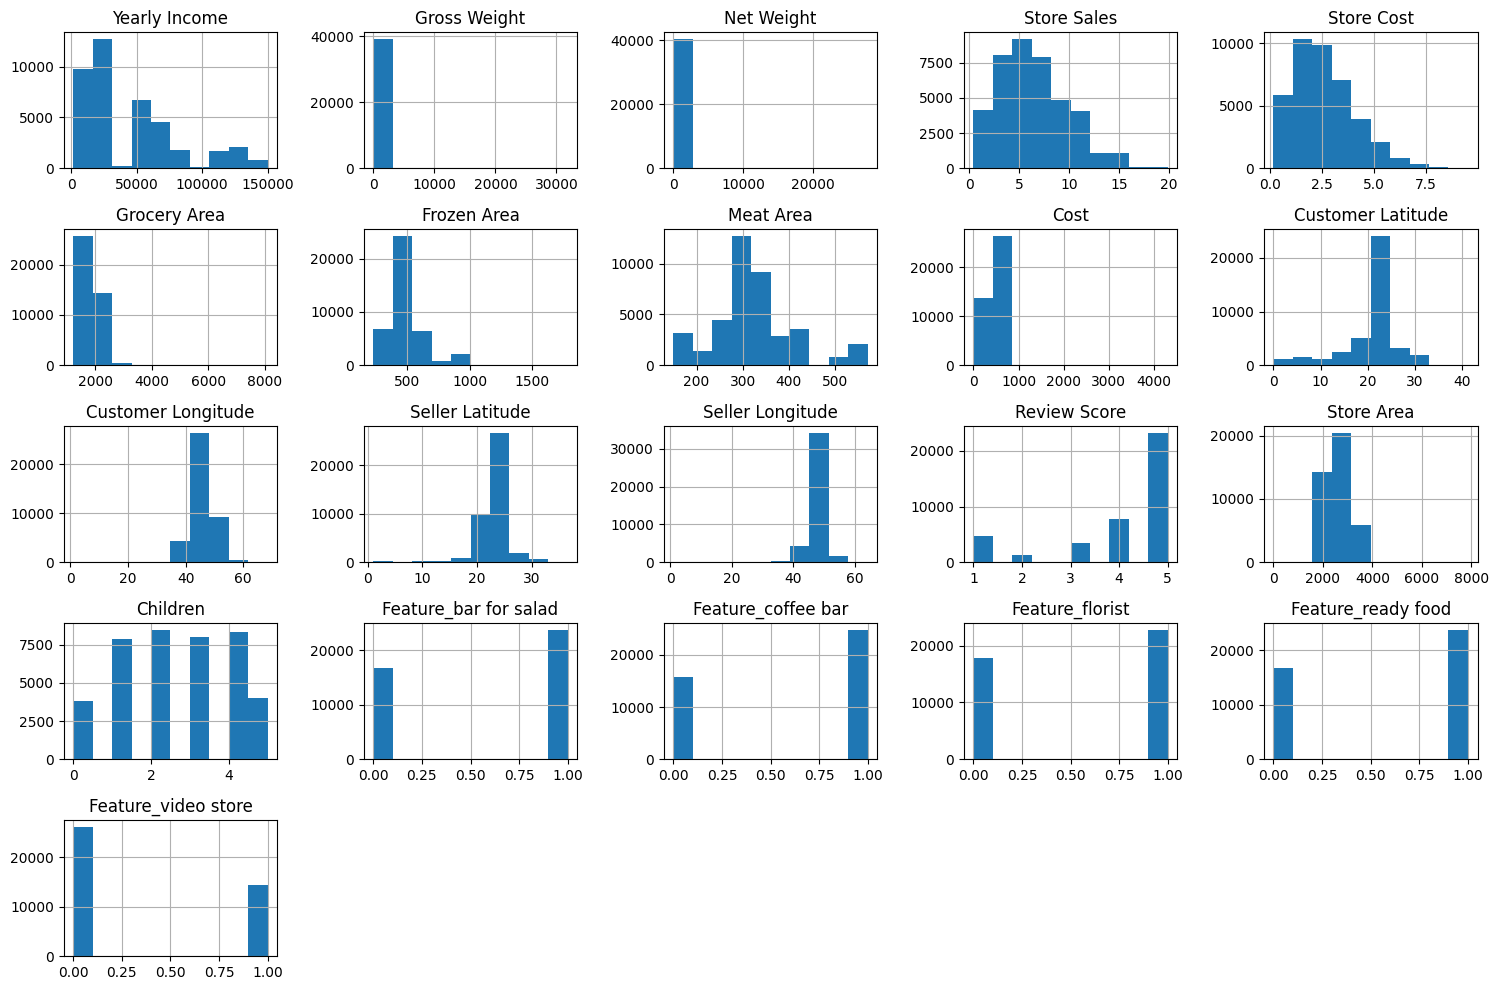

In [ ]:
df_copy[num_cols].hist(bins=10,figsize=(15,10))
plt.tight_layout()
plt.show()

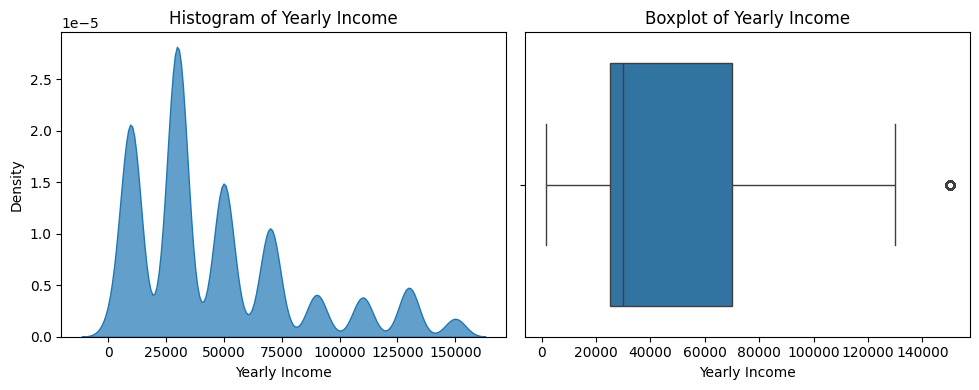

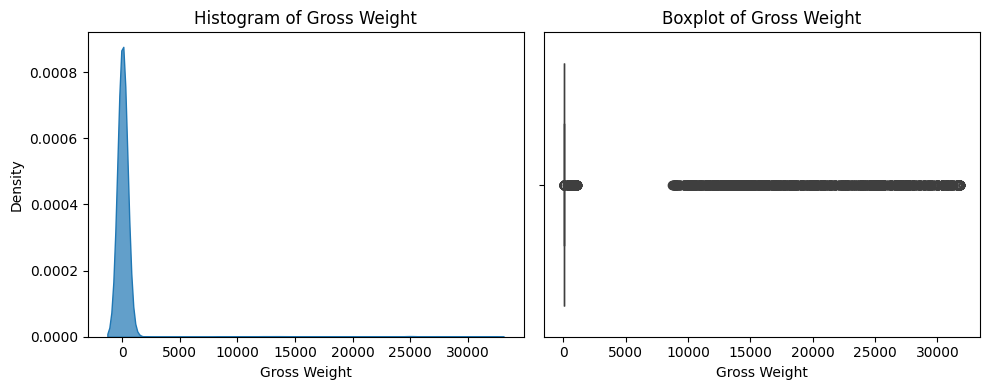

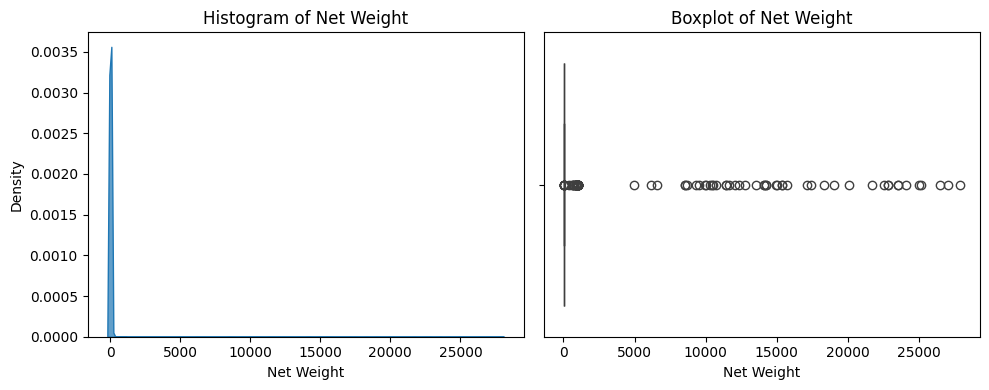

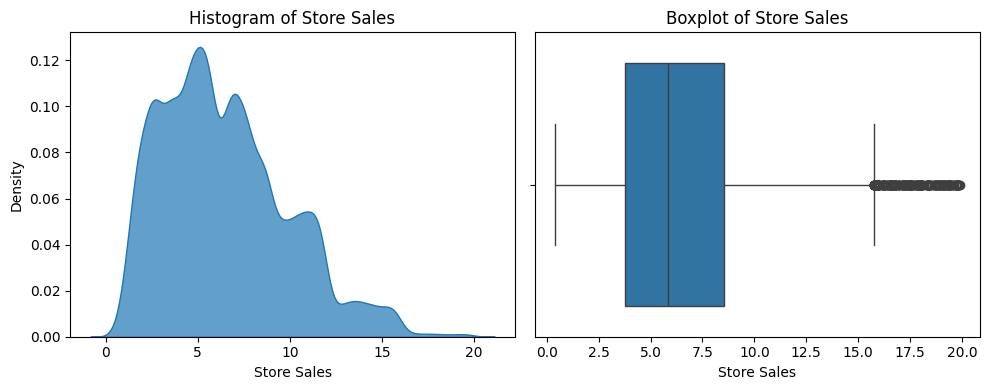

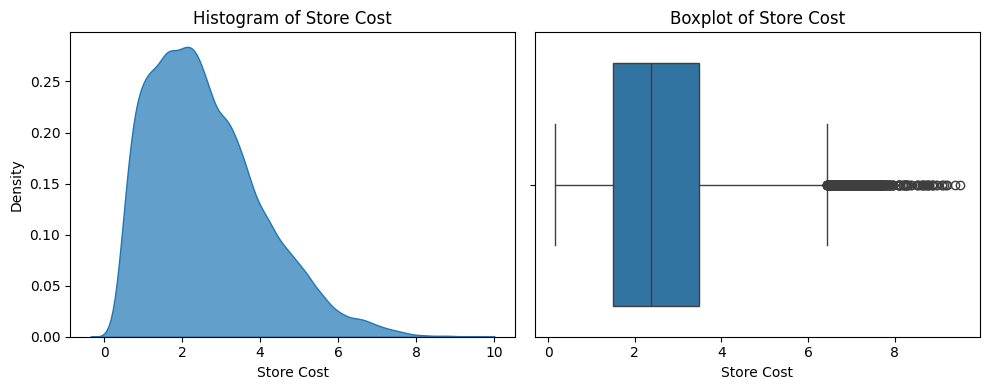

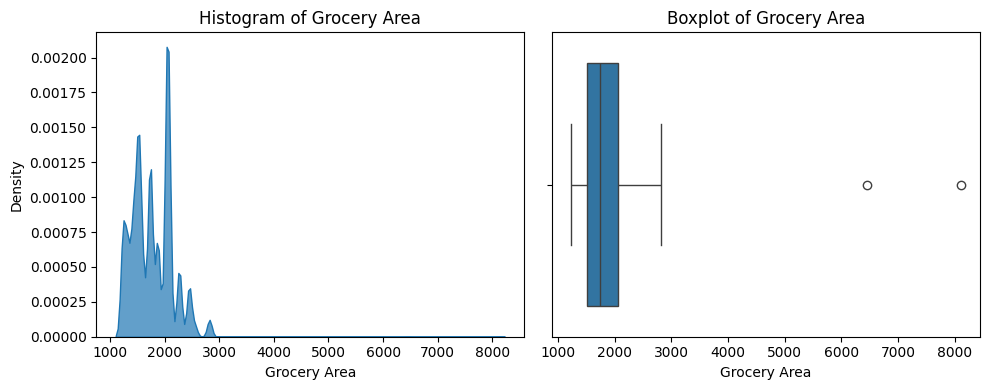

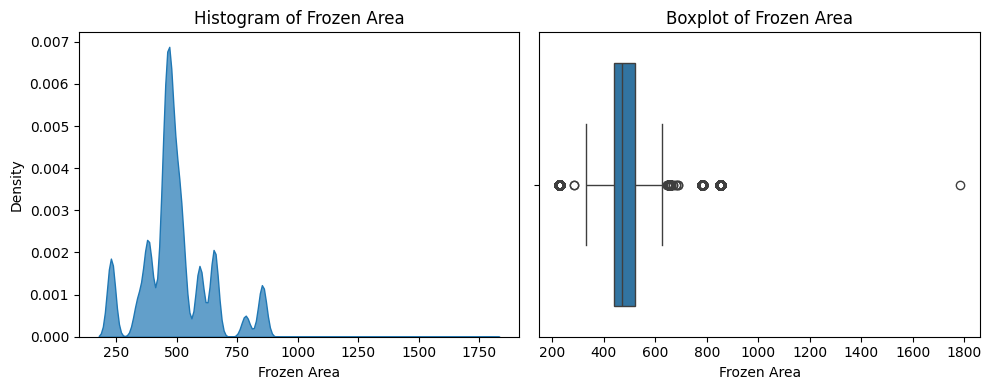

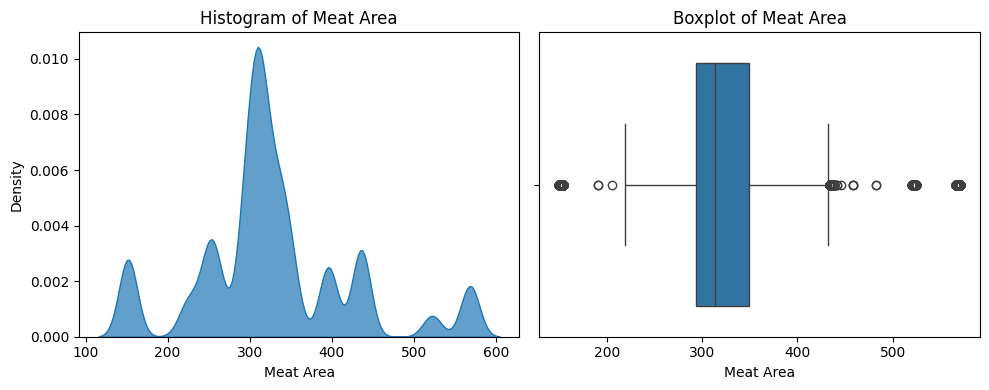

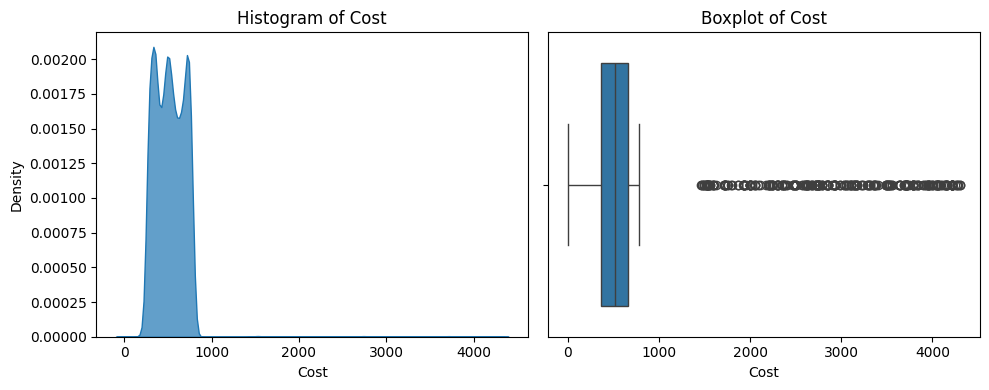

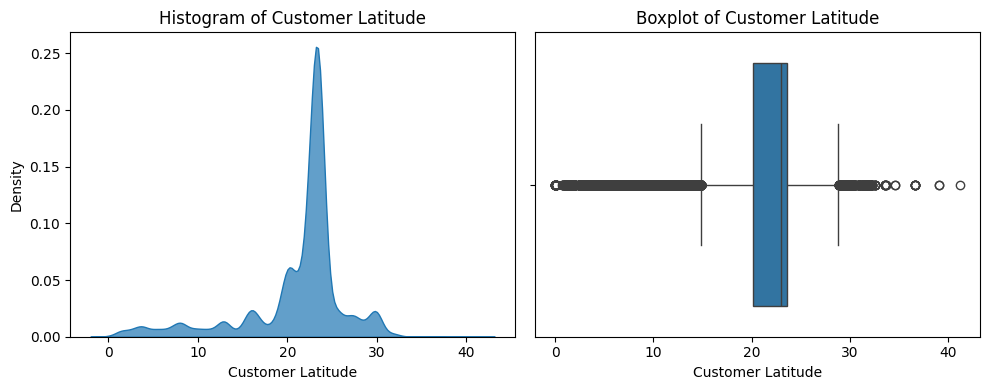

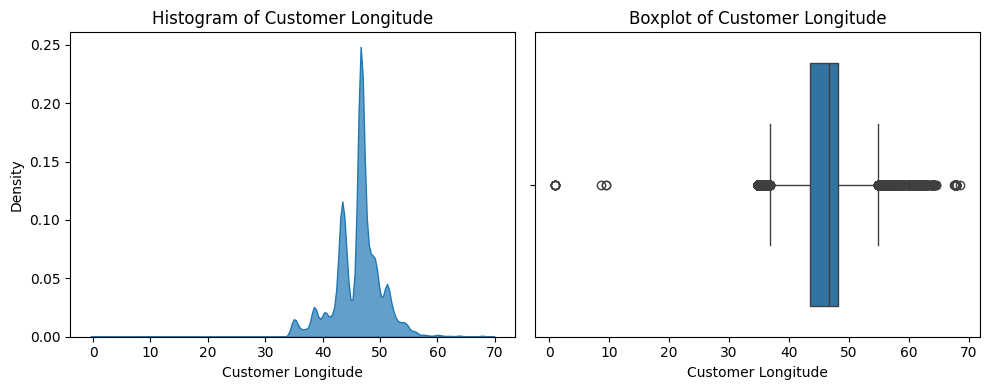

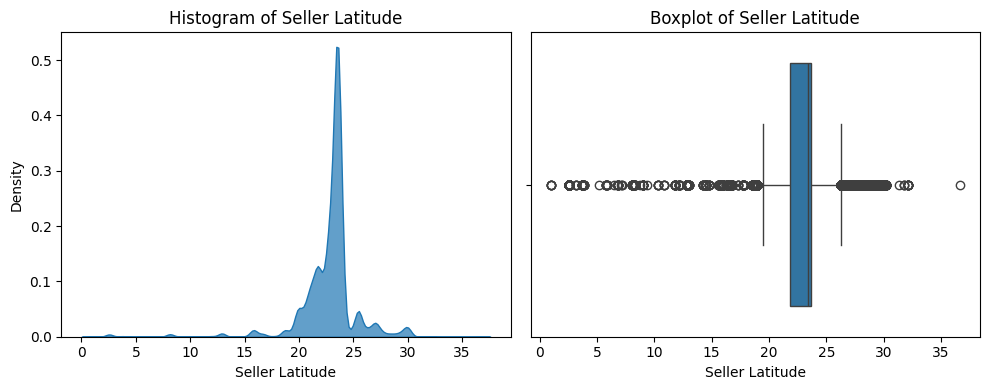

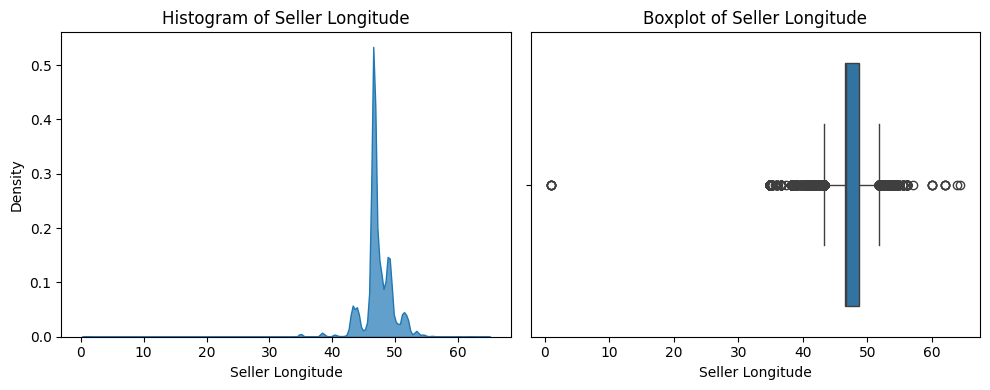

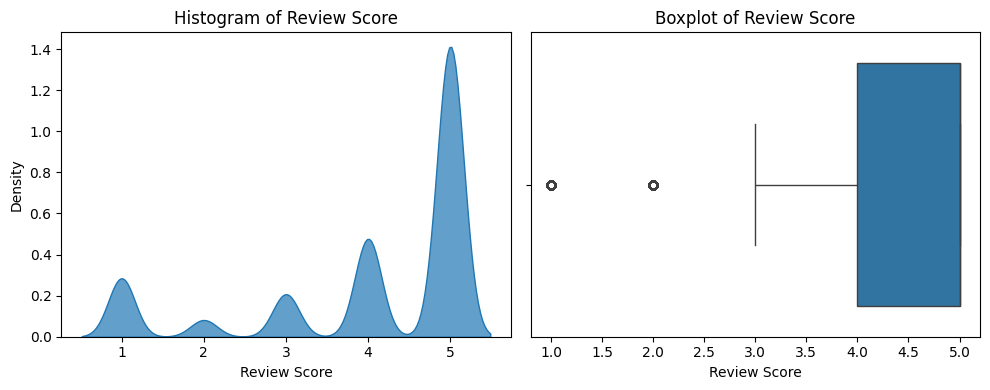

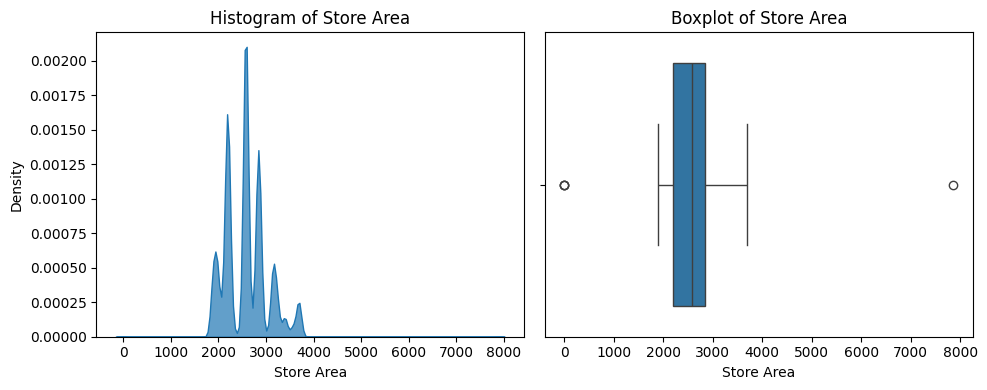

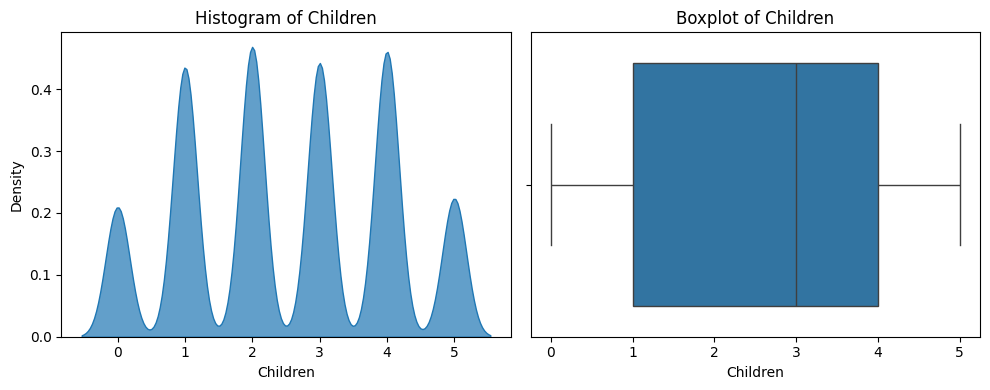

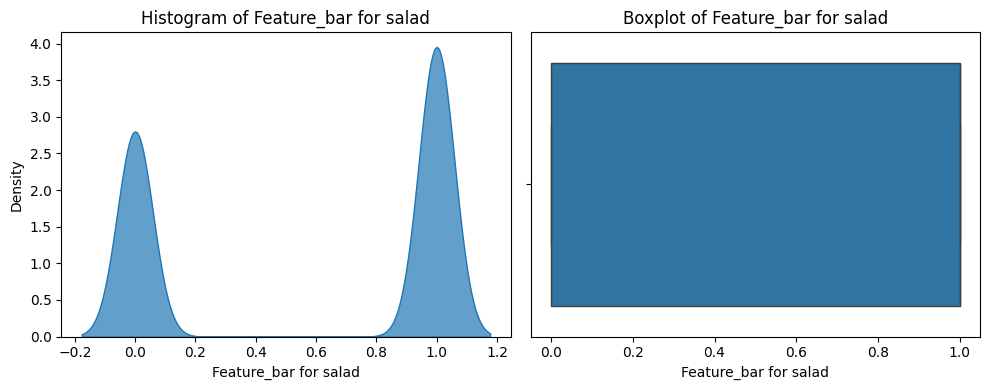

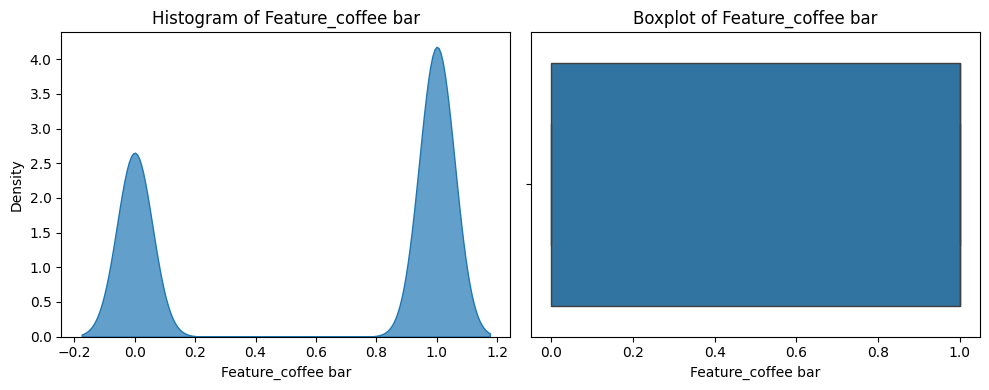

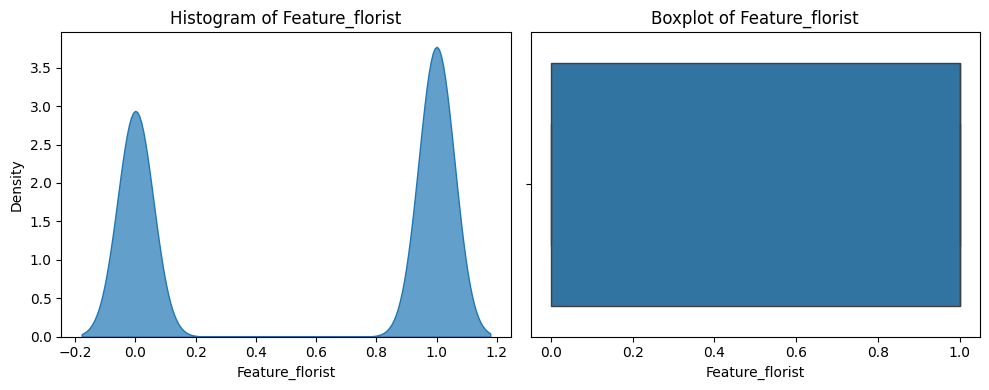

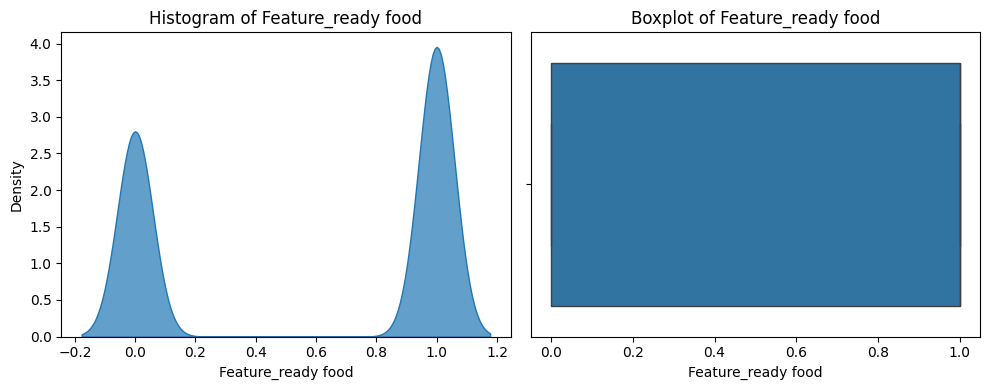

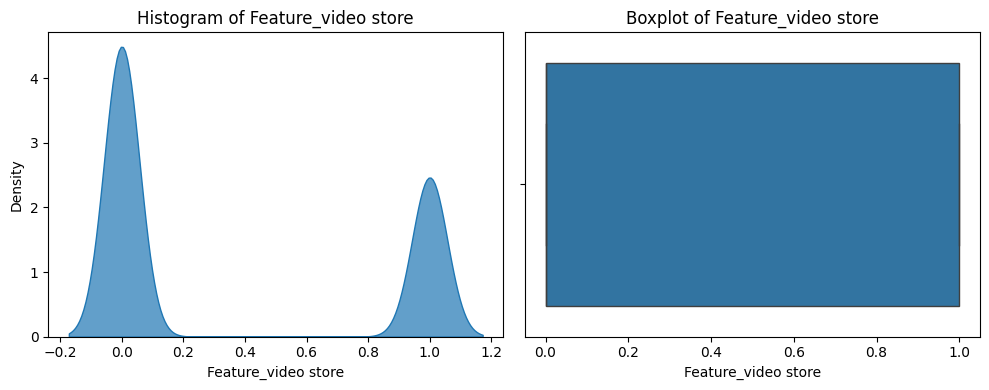

In [ ]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    sns.kdeplot(df_copy[col], ax=axes[0],fill=True,alpha=0.7)
    axes[0].set_title(f'Histogram of {col}')

    sns.boxplot(x=df_copy[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

In [ ]:
df_copy.columns

Index(['Yearly Income', 'Gross Weight', 'Net Weight', 'Is Recyclable?',
       'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost', 'Customer City',
       'Customer State', 'Customer Latitude', 'Customer Longitude',
       'Seller City', 'Seller State', 'Seller Latitude', 'Seller Longitude',
       'Review Score', 'Store Area', 'Marital_Status', 'Gender', 'Children',
       'Education', 'Occupation', 'Product_Type', 'Order_Department',
       'Ordered_Brand', 'Income_Bin', 'Feature_bar for salad',
       'Feature_coffee bar', 'Feature_florist', 'Feature_ready food',
       'Feature_video store'],
      dtype='object')

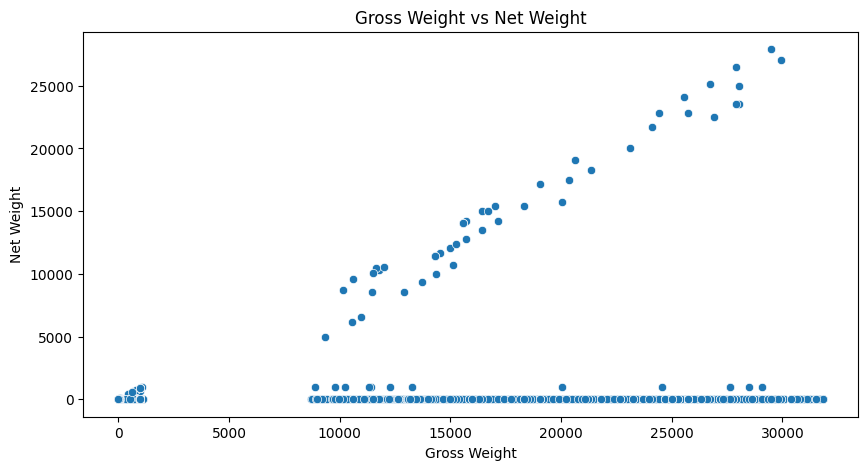

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Gross Weight',y='Net Weight', data=df_copy)
plt.title('Gross Weight vs Net Weight')
plt.show()

plt.show()

# **Feature Engineering**

In [ ]:
df.columns

Index(['Yearly Income', 'Gross Weight', 'Net Weight', 'Is Recyclable?',
       'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost', 'Customer City',
       'Customer State', 'Customer Latitude', 'Customer Longitude',
       'Seller City', 'Seller State', 'Seller Latitude', 'Seller Longitude',
       'Review Score', 'Store Area', 'Marital_Status', 'Gender', 'Children',
       'Education', 'Occupation', 'Product_Type', 'Order_Department',
       'Ordered_Brand', 'Income_Bin', 'Feature_bar for salad',
       'Feature_coffee bar', 'Feature_florist', 'Feature_ready food',
       'Feature_video store'],
      dtype='object')

In [ ]:
df_feature=df.copy()

In [ ]:
df_feature["Profit"] = df_feature["Store Sales"] - df_feature["Store Cost"]
df_feature["Profit Margin"] = df_feature["Profit"] / (df_feature["Store Sales"] + 1e-6)
df_feature['Net_to_Gross_Ratio'] = df_feature['Net Weight'] / df_feature['Gross Weight']
df_feature['Has_Children'] = df_feature['Children'] > 0
df_feature['Is_Food_Product'] = df_feature['Product_Type'].str.lower().isin(['grocery', 'meat', 'frozen', 'ready food'])
df_feature['High_Income'] = df_feature['Yearly Income'] > df_feature['Yearly Income'].median()
df_feature["Income_to_Sales"] = df_feature["Yearly Income"] / (df_feature["Store Sales"] + 1e-6)
df_feature["Income_to_Cost"] = df_feature["Yearly Income"] / (df_feature["Store Cost"] + 1e-6)
df_feature["Cost_per_Area"] = df_feature["Store Cost"] / (df_feature["Store Area"] + 1e-6)
df_feature["Sales_per_Area"] = df_feature["Store Sales"] / (df_feature["Store Area"] + 1e-6)
feature_cols = ['Feature_bar for salad', 'Feature_coffee bar', 'Feature_florist',
                    'Feature_ready food', 'Feature_video store']
df_feature['Total_Features_Selected'] =df_feature[feature_cols].sum(axis=1)
def haversine_distance(lat1, lon1, lat2, lon2):

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    R = 6371
    return R * c
df_feature['Customer_Seller_Dist_km'] = haversine_distance(
       df_feature['Customer Latitude'], df_feature['Customer Longitude'],
       df_feature['Seller Latitude'], df_feature['Seller Longitude'])


In [ ]:

def create_income_bins(df, col='Yearly Income', new_col='Income_Bin'):


    bins = [0, 20000, 40000, 60000, 80000, 100000, 160000]
    labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Ultra High']


    df[new_col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)

    return df


df_feature = create_income_bins(df_feature)



In [ ]:
feature_cols = ['Feature_bar for salad', 'Feature_coffee bar', 'Feature_florist',
                    'Feature_ready food', 'Feature_video store']
test['Total_Features_Selected'] =test[feature_cols].sum(axis=1)

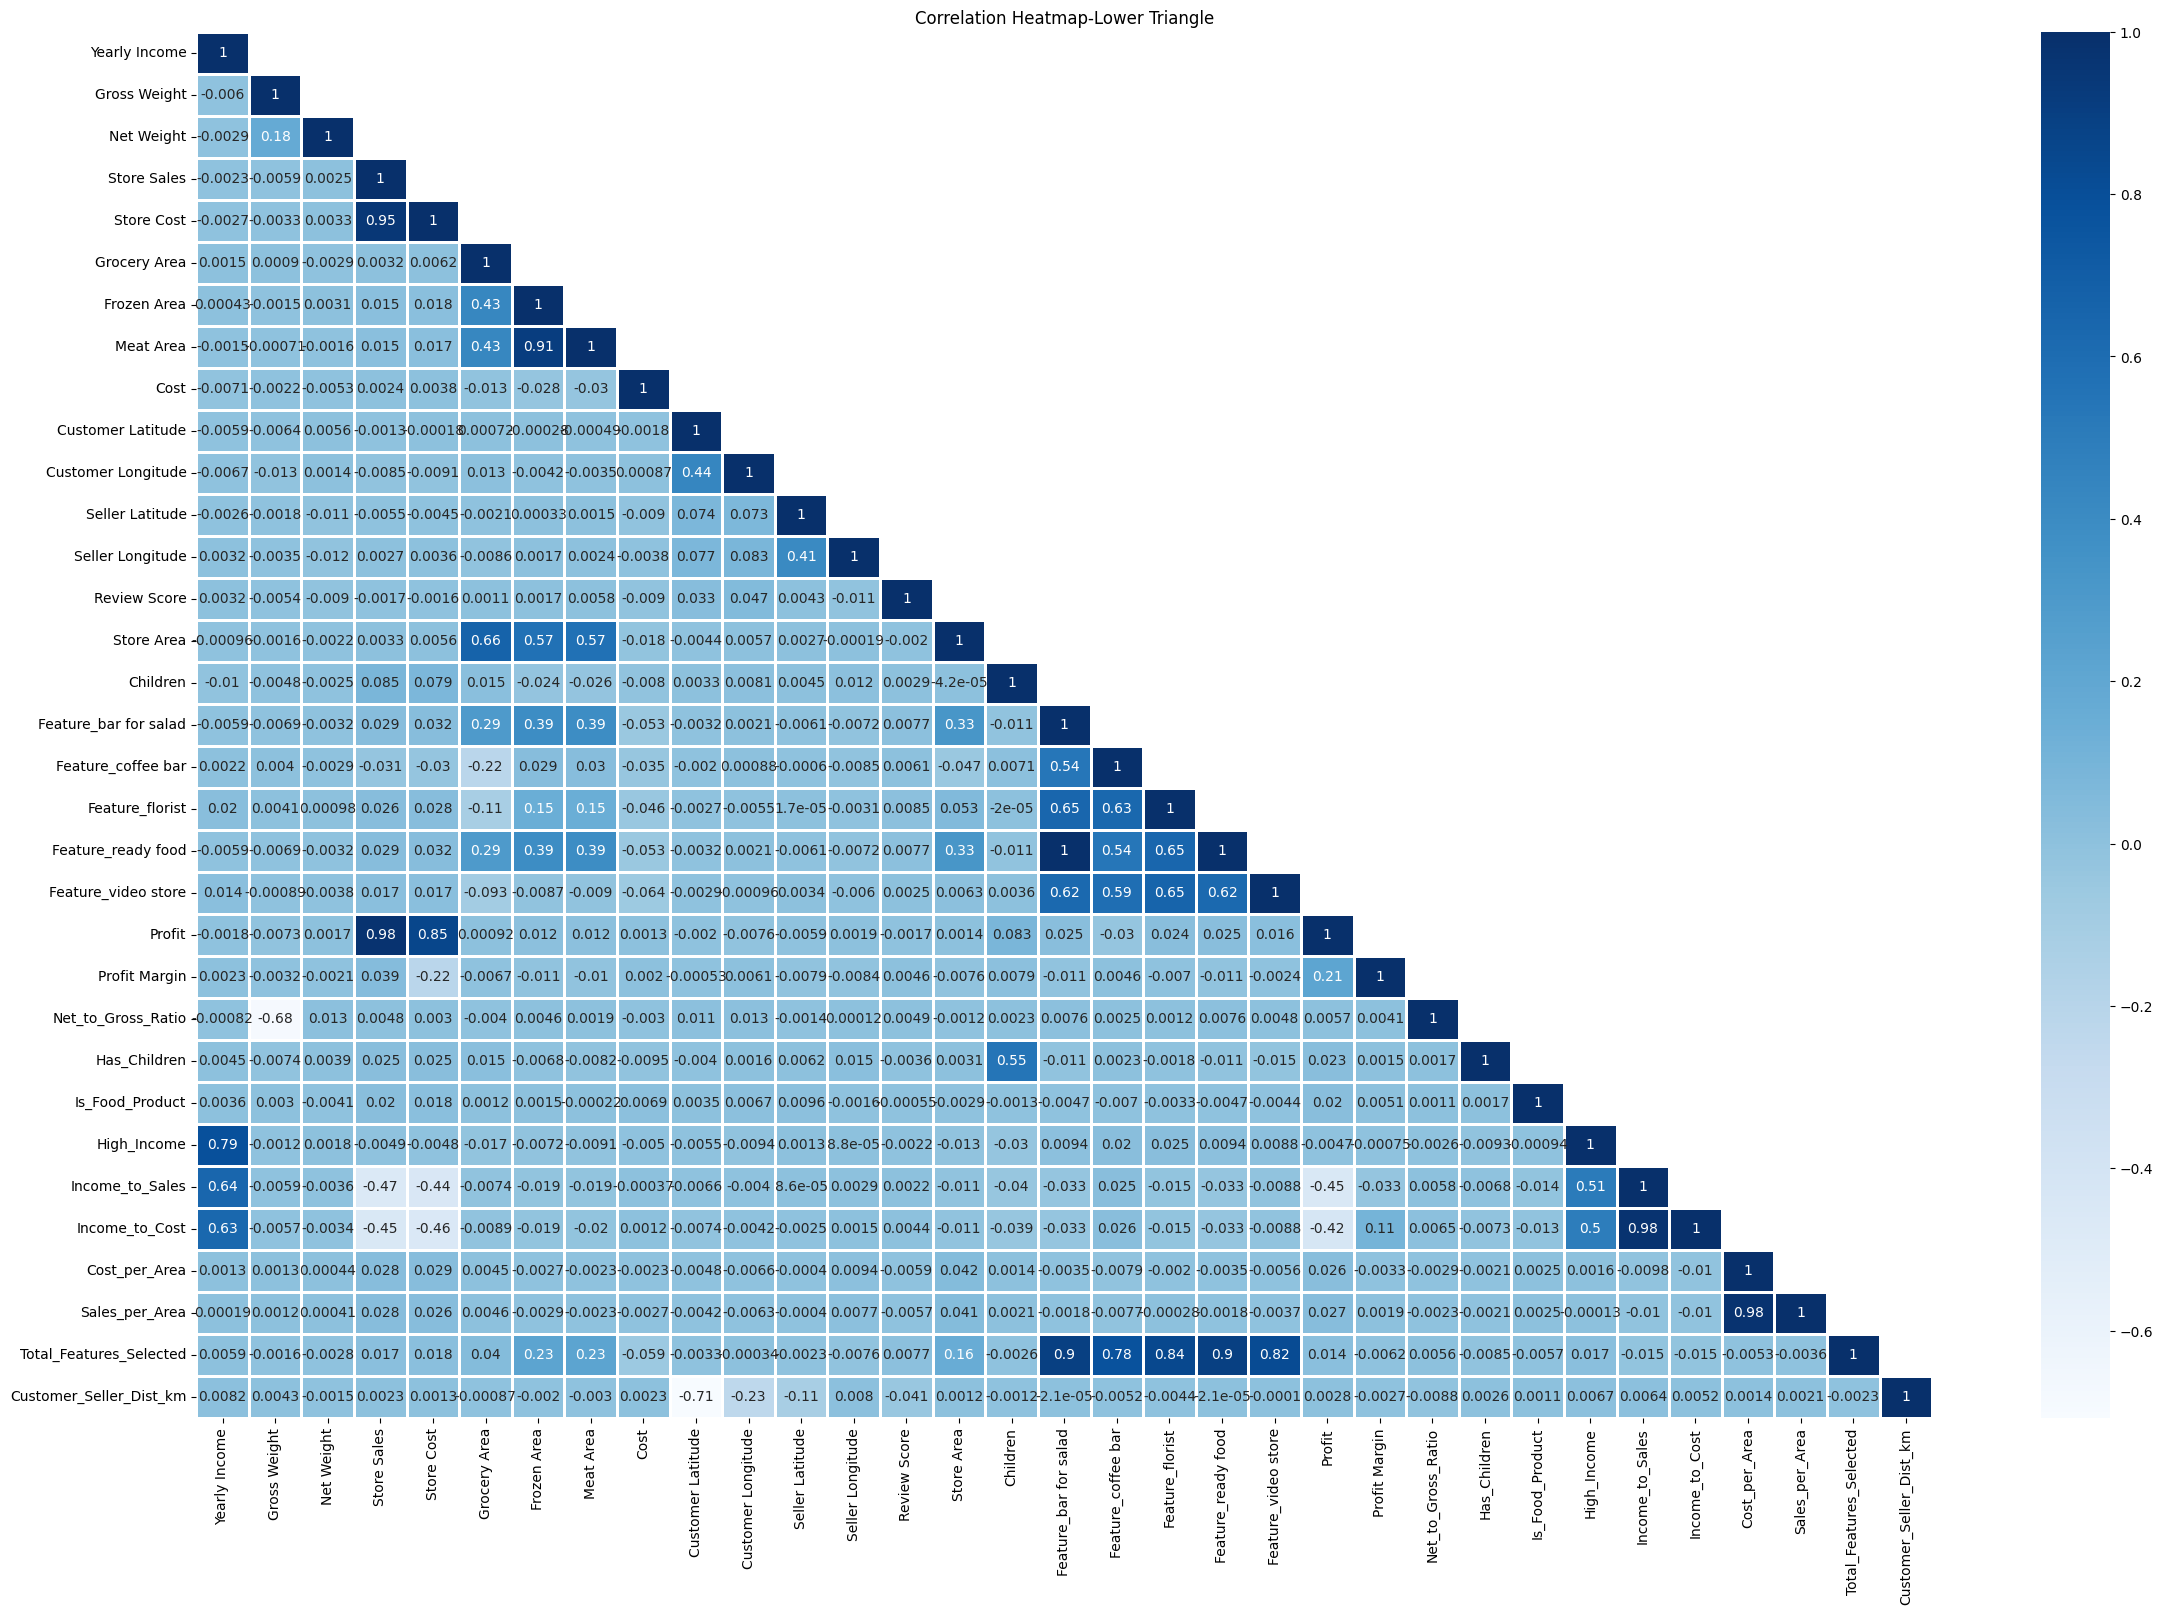

In [ ]:

corr = df_feature.corr(numeric_only=True)
plt.figure(figsize=(28, 18))
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
sns.heatmap(corr, mask=mask, annot=True, linewidths=1, linecolor="white",cmap='Blues')
plt.title("Correlation Heatmap-Lower Triangle")
plt.show()

# **Preprocessing For Modeling**

In [ ]:
!pip install catboost xgboost

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 8.2 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split ,GridSearchCV,RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from imblearn.pipeline import Pipeline

from sklearn.preprocessing import QuantileTransformer, MinMaxScaler,RobustScaler

from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer,KNNImputer


from sklearn.ensemble import StackingRegressor
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor, XGBRFRegressor
import xgboost as xgb

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import optuna
from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [ ]:
X = df_feature.drop(columns=['Cost'])
Y =df_feature['Cost']

In [ ]:
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['Yearly Income', 'Gross Weight', 'Net Weight', 'Store Sales',
       'Store Cost', 'Grocery Area', 'Frozen Area', 'Meat Area',
       'Customer Latitude', 'Customer Longitude', 'Seller Latitude',
       'Seller Longitude', 'Review Score', 'Store Area', 'Children',
       'Feature_bar for salad', 'Feature_coffee bar', 'Feature_florist',
       'Feature_ready food', 'Feature_video store', 'Profit', 'Profit Margin',
       'Net_to_Gross_Ratio', 'Income_to_Sales', 'Income_to_Cost',
       'Cost_per_Area', 'Sales_per_Area', 'Total_Features_Selected',
       'Customer_Seller_Dist_km'],
      dtype='object')

In [ ]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['Is Recyclable?', 'Promotion Name', 'Store Kind', 'Customer City',
       'Customer State', 'Seller City', 'Seller State', 'Marital_Status',
       'Gender', 'Education', 'Occupation', 'Product_Type', 'Order_Department',
       'Ordered_Brand', 'Income_Bin'],
      dtype='object')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
class ClipOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        import pandas as pd


        if not isinstance(X, pd.DataFrame):
            X_copy = pd.DataFrame(X, columns=self.columns)
        else:
            X_copy = X.copy()

        for col in self.columns:
            Q1 = X_copy[col].quantile(0.25)
            Q3 = X_copy[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            X_copy[col] = np.clip(X_copy[col], lower, upper)

        return X_copy.values

In [ ]:
log_cols=['Gross Weight','Net Weight','Grocery Area', 'Frozen Area', 'Meat Area']
non_log_cols=['Yearly Income', 'Store Sales',
       'Store Cost',
       'Customer Latitude', 'Customer Longitude', 'Seller Latitude',
       'Seller Longitude', 'Review Score', 'Store Area', 'Children',
       'Feature_bar for salad', 'Feature_coffee bar', 'Feature_florist',
       'Feature_ready food', 'Feature_video store', 'Profit', 'Profit Margin',
       'Net_to_Gross_Ratio', 'Income_to_Sales', 'Income_to_Cost',
       'Cost_per_Area', 'Sales_per_Area', 'Total_Features_Selected',
       'Customer_Seller_Dist_km']

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
     ('clip', ClipOutliers(columns=non_log_cols)),
    # ('log', FunctionTransformer(np.log1p, validate=False)),
    ("scaler", StandardScaler())
])

log_pipe=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
     ('log', FunctionTransformer(np.log1p, validate=False)),

     ('clip', ClipOutliers(columns=log_cols)),
     ("scaler", StandardScaler())

])
categorical_transformer = Pipeline([
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])


In [ ]:
preprocessor = ColumnTransformer([
        ('log', log_pipe, log_cols),
        ("num", numerical_transformer, non_log_cols),
        ("cat", categorical_transformer, categorical_cols)

])


# **Dummy regressor**

In [ ]:
dummy_reg = DummyRegressor(strategy='median')


dummy_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', dummy_reg)
])


dummy_pipeline.fit(x_train, y_train)


y_pred_dummy = dummy_pipeline.predict(x_test)

mse = mean_squared_error(y_test, y_pred_dummy)
rmse = np.sqrt(mse)
print("RMSE (Dummy):", rmse)

RMSE (Dummy): 251.414346233728


# **Lazy regressor**

In [ ]:
# X_train_processed = preprocessor.fit_transform(x_train)
# X_test_processed = preprocessor.transform(x_test)


# reg = LazyRegressor(verbose=1, ignore_warnings=True, predictions=True)
# models, predictions = reg.fit(X_train_processed, X_test_processed, y_train, y_test)

# print(models.head(10))

It was really slow ,so ignore it

# **Feature Selection& Importance**

In [ ]:
hgb_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", HistGradientBoostingRegressor(
        max_iter=200,
        max_depth=10,
        learning_rate=0.05,
        random_state=42
    ))
])


hgb_pipeline.fit(x_train, y_train)


y_pred = hgb_pipeline.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 221.80443963997325


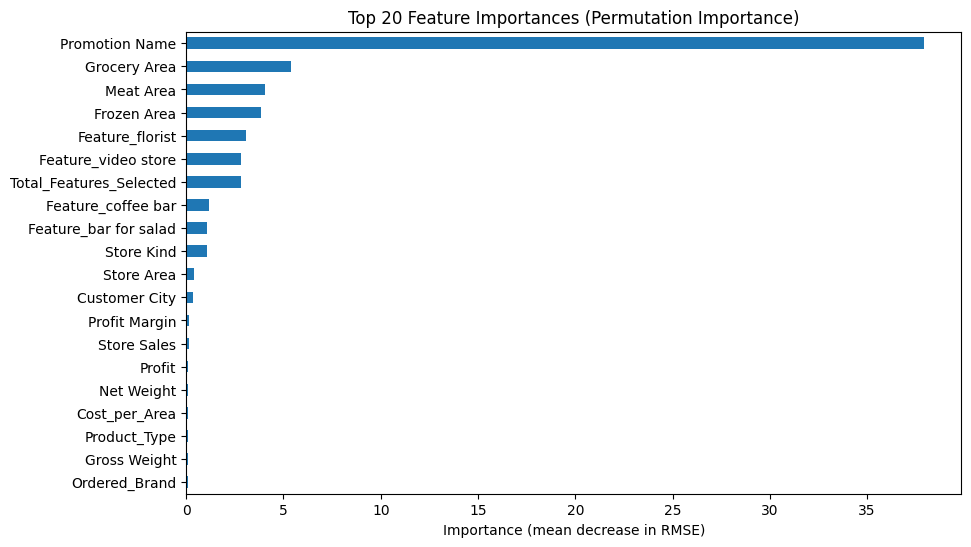

In [ ]:


from sklearn.inspection import permutation_importance


result = permutation_importance(
    hgb_pipeline, x_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring='neg_root_mean_squared_error'
)

feature_names = list(x_test.columns)
importances = pd.Series(result.importances_mean, index=feature_names)
importances_sorted = importances.sort_values(ascending=False)


top_n = 20
plt.figure(figsize=(10,6))
importances_sorted[:top_n].plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 20 Feature Importances (Permutation Importance)')
plt.xlabel('Importance (mean decrease in RMSE)')
plt.show()


In [ ]:
importances_sorted[:20]

,0
Promotion Name,37.94
Grocery Area,5.38
Meat Area,4.05
Frozen Area,3.85
Feature_florist,3.10
Feature_video store,2.82
Total_Features_Selected,2.82
Feature_coffee bar,1.16
Feature_bar for salad,1.09
Store Kind,1.07


Now ,i decided to use only top 10 features

In [ ]:
top_features = [
    'Promotion Name',
    'Grocery Area',
    'Meat Area',
    'Frozen Area',
    'Feature_florist',
    'Feature_video store',
    'Total_Features_Selected',
    'Feature_coffee bar',
    'Feature_bar for salad',
    'Store Kind'
]

log_cols=['Gross Weight','Net Weight','Grocery Area', 'Frozen Area', 'Meat Area']
log_cols_selected = [col for col in top_features if col in log_cols]
categorical_cols_selected = [col for col in top_features if col not in log_cols_selected and col in categorical_cols]
numerical_cols_selected = [col for col in top_features if col not in log_cols_selected and col not in categorical_cols_selected]

numerical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

log_transformer = Pipeline([
   ("imputer", SimpleImputer(strategy="median")),
    ("log", FunctionTransformer(np.log1p, validate=False)),

    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor_sel = ColumnTransformer([
    ("log", log_transformer, log_cols_selected),
    ("num", numerical_transformer, numerical_cols_selected),
    ("cat", categorical_transformer, categorical_cols_selected)
])

X_selected = df_feature[top_features]
y = df_feature['Cost']

x_train_sel, x_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)


In [ ]:

models = [
    SVR(),
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    ElasticNet(alpha=0.5, l1_ratio=0.5),

]


results = []

for model in models:
    pipeline = Pipeline([
        ("preprocessor", preprocessor_sel),
        ("regressor", model)
    ])
    pipeline.fit(x_train_sel, y_train_sel)
    y_pred = pipeline.predict(x_test_sel)
    rmse = np.sqrt(mean_squared_error(y_test_sel, y_pred))
    results.append((model.__class__.__name__, rmse))


results = sorted(results, key=lambda x: x[1])
for name, rmse in results:
    print(f"{name}: RMSE = {rmse:.3f}")

LinearRegression: RMSE = 238.586
Ridge: RMSE = 238.589
SVR: RMSE = 242.570
Lasso: RMSE = 242.959
ElasticNet: RMSE = 248.498


In [ ]:

models = [
    HistGradientBoostingRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    ExtraTreesRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    XGBRegressor(random_state=42),
    XGBRFRegressor(random_state=42),
    CatBoostRegressor(random_state=42, verbose=False),
    LGBMRegressor(random_state=42)
]

results = []

for model in models:
    pipeline = Pipeline([
        ("preprocessor", preprocessor_sel),
        ("regressor", model)
    ])
    pipeline.fit(x_train_sel, y_train_sel)
    y_pred = pipeline.predict(x_test_sel)
    rmse = np.sqrt(mean_squared_error(y_test_sel, y_pred))
    results.append((model.__class__.__name__, rmse))

results = sorted(results, key=lambda x: x[1])
for name, rmse in results:
    print(f"{name}: RMSE = {rmse:.3f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 32409, number of used features: 62
[LightGBM] [Info] Start training from score 533.960259
HistGradientBoostingRegressor: RMSE = 216.438
LGBMRegressor: RMSE = 216.694
CatBoostRegressor: RMSE = 217.074
XGBRegressor: RMSE = 222.196
GradientBoostingRegressor: RMSE = 233.003
RandomForestRegressor: RMSE = 241.468
XGBRFRegressor: RMSE = 243.511
ExtraTreesRegressor: RMSE = 264.366
AdaBoostRegressor: RMSE = 299.251


I choosed HGB,LGBM,CatBoostRegressor,XGBRegressor to fine tune and use

After Some Fine tuning using Random search,Grid search,or sometimes Optuna:

In [ ]:
#best params untill now
from lightgbm import LGBMRegressor


lgb_selected_pipeline = Pipeline([
    ("preprocessor", preprocessor_sel),
    ("regressor", LGBMRegressor(
        n_estimators= 399,
        max_depth=13,
        learning_rate=0.052951905366658066,
        min_child_samples=41,
        subsample=0.6831579515369586,
        colsample_bytree=0.6788596539640442,
        random_state=42,
        verbose=-1,
        reg_lambda= 0.20657241338988191,
        reg_alpha=0.16216655757635556
    ))
])
lgb_selected_pipeline.fit(x_train_sel, y_train_sel)


y_train_pred_lgb = lgb_selected_pipeline.predict(x_train_sel)
rmse_train_lgb = np.sqrt(mean_squared_error(y_train_sel, y_train_pred_lgb))
print("RMSE on train (top 10 features, LGBM - tuned):", rmse_train_lgb)


y_test_pred_lgb = lgb_selected_pipeline.predict(x_test_sel)
rmse_test_lgb = np.sqrt(mean_squared_error(y_test_sel, y_test_pred_lgb))
print("RMSE on test (top 10 features, LGBM - tuned):", rmse_test_lgb)

RMSE on train (top 10 features, LGBM - tuned): 222.56624714815115
RMSE on test (top 10 features, LGBM - tuned): 214.80107906129564


In [ ]:
#best params untill now
hgb_selected_pipeline = Pipeline([
    ("preprocessor", preprocessor_sel),
    ("regressor", HistGradientBoostingRegressor(
        max_iter= 381,
        max_depth=9,
        max_bins= 150,
        learning_rate= 0.05315718037738781,
        min_samples_leaf=36,
        random_state=42
    ))
])


hgb_selected_pipeline.fit(x_train_sel, y_train_sel)


y_train_pred_hgb = hgb_selected_pipeline.predict(x_train_sel)
rmse_train_hgb = np.sqrt(mean_squared_error(y_train_sel, y_train_pred_hgb))
print("RMSE on train (top 10 features, HGB):", rmse_train_hgb)


y_test_pred_hgb = hgb_selected_pipeline.predict(x_test_sel)
rmse_test_hgb = np.sqrt(mean_squared_error(y_test_sel, y_test_pred_hgb))
print("RMSE on test (top 10 features, HGB):", rmse_test_hgb)

RMSE on train (top 10 features, HGB): 224.8182716030836
RMSE on test (top 10 features, HGB): 214.62956842354902


In [ ]:
#best params untill now

cat_selected_pipeline = Pipeline([
    ("preprocessor", preprocessor_sel),
    ("regressor", CatBoostRegressor(
     iterations=1000, depth=10, learning_rate=0.03, l2_leaf_reg=13,
        random_state=42,
        verbose=0
    ))
])


cat_selected_pipeline.fit(x_train_sel, y_train_sel)


y_train_pred_cat = cat_selected_pipeline.predict(x_train_sel)
rmse_train_cat = np.sqrt(mean_squared_error(y_train_sel, y_train_pred_cat))
print("RMSE on train (top 10 features, CatBoost):", rmse_train_cat)

y_test_pred_cat = cat_selected_pipeline.predict(x_test_sel)
rmse_test_cat = np.sqrt(mean_squared_error(y_test_sel, y_test_pred_cat))
print("RMSE on test (top 10 features, CatBoost):", rmse_test_cat)

RMSE on train (top 10 features, CatBoost): 219.44300081722724
RMSE on test (top 10 features, CatBoost): 214.942422415567


In [ ]:
#best params untill now

xgb_selected_pipeline = Pipeline([
    ("preprocessor", preprocessor_sel),
    ("regressor", XGBRegressor(
n_estimators=1200,
learning_rate=0.032,
max_depth=4,
subsample=0.82,
colsample_bytree=0.7,
reg_alpha=0.85555,
reg_lambda=0.8,
        random_state=42,
        verbosity=0
    ))
])
xgb_selected_pipeline.fit(x_train_sel, y_train_sel)

y_train_pred_xgb = xgb_selected_pipeline.predict(x_train_sel)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train_sel, y_train_pred_xgb))
print("RMSE on train (top 10 features, XGB):", rmse_train_xgb)

y_test_pred_xgb = xgb_selected_pipeline.predict(x_test_sel)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test_sel, y_test_pred_xgb))
print("RMSE on test (top 10 features, XGB):", rmse_test_xgb)

RMSE on train (top 10 features, XGB): 218.4378421731755
RMSE on test (top 10 features, XGB): 215.64006566831245


Stack with 4 models:

In [ ]:
stack = StackingRegressor(
    estimators=[
        ("cat", CatBoostRegressor(
            iterations=1000, depth=10, learning_rate=0.03, l2_leaf_reg=13,
        random_state=42,
            verbose=0
        )),
        ("hgb", HistGradientBoostingRegressor(
          max_iter= 381,
        max_depth=9,
        max_bins= 150,
        learning_rate= 0.05315718037738781,
        min_samples_leaf=36,
        random_state=42
        )),
        ("lgb", LGBMRegressor(
        n_estimators= 399,
        max_depth=13,
        learning_rate=0.052951905366658066,
        min_child_samples=41,
        subsample=0.6831579515369586,
        colsample_bytree=0.6788596539640442,
        random_state=42,
        verbose=-1,
        reg_lambda= 0.20657241338988191,
        reg_alpha=0.16216655757635556
        )),



        ('xgb',XGBRegressor(
        n_estimators=1200,
        learning_rate=0.032,
        max_depth=4,
        subsample=0.82,
        colsample_bytree=0.7,
        reg_alpha=0.85555,
        reg_lambda=0.8,
        random_state=42,
        verbosity=0
    )



         )
    ],
    final_estimator=Ridge(alpha=1.0),
    n_jobs=-1
)


stack_pipeline = Pipeline([
    ("preprocessor", preprocessor_sel),
    ("stacking", stack)
])


stack_pipeline.fit(x_train_sel, y_train_sel)


y_train_pred_stack = stack_pipeline.predict(x_train_sel)
rmse_train_stack = np.sqrt(mean_squared_error(y_train_sel, y_train_pred_stack))
print("RMSE on train (stacking):", rmse_train_stack)


y_test_pred_stack = stack_pipeline.predict(x_test_sel)
rmse_test_stack = np.sqrt(mean_squared_error(y_test_sel, y_test_pred_stack))
print("RMSE on test (stacking):", rmse_test_stack)

RMSE on train (stacking): 219.6055881385479
RMSE on test (stacking): 214.0099182525014


Now train on all train data

In [ ]:
stack = StackingRegressor(
    estimators=[
        ("cat", CatBoostRegressor(
            iterations=1000, depth=10, learning_rate=0.03, l2_leaf_reg=13,
        random_state=42,
            verbose=0
        )),
        ("hgb", HistGradientBoostingRegressor(
          max_iter= 381,
        max_depth=9,
        max_bins= 150,
        learning_rate= 0.05315718037738781,
        min_samples_leaf=36,
        random_state=42
        )),
        ("lgb", LGBMRegressor(
        n_estimators= 399,
        max_depth=13,
        learning_rate=0.052951905366658066,
        min_child_samples=41,
        subsample=0.6831579515369586,
        colsample_bytree=0.6788596539640442,
        random_state=42,
        verbose=-1,
        reg_lambda= 0.20657241338988191,
        reg_alpha=0.16216655757635556
        )),



        ('xgb',XGBRegressor(
        n_estimators=1200,
        learning_rate=0.032,
        max_depth=4,
        subsample=0.82,
        colsample_bytree=0.7,
        reg_alpha=0.85555,
        reg_lambda=0.8,
        random_state=42,
        verbosity=0
    )



         )
    ],
    final_estimator=Ridge(alpha=1.0),
    n_jobs=-1
)


stack_pipeline_fin = Pipeline([
    ("preprocessor", preprocessor_sel),
    ("stacking", stack)
])


stack_pipeline_fin.fit(X_selected,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  []),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Grocery Area', 'Meat Area',
                                                   'Frozen Area',
                                                   'F...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.032,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=4,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=1200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None, ...))],
                                   final_estimator=Ridge(), n_jobs=-1))])

In [ ]:
test['id'] = range(len(test))

In [ ]:
test.head(199444)

,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,...,Order_Department,Ordered_Brand,Income_Bin,Feature_bar for salad,Feature_coffee bar,Feature_florist,Feature_ready food,Feature_video store,Total_Features_Selected,id
0,Fantastic Discounts,gourmet,11.76,4.7040,31.8337,28.7811,Yes,50000.0,2201.06,1424.85,...,snacks,gulf coast,Medium,1,1,1,1,1,5,0
1,Bag Stuffer,deluxe,2.16,0.6696,29.9440,27.0368,No,70000.0,2577.16,1735.17,...,frozen foods,golden,High,1,1,1,1,1,5,1
2,Pick Your Savings,deluxe,1.60,0.8235,29.2172,26.3100,No,130000.0,2837.58,2038.11,...,dairy,club,High,1,1,1,1,1,5,2
3,Price Winners,deluxe,8.82,4.4100,28.0543,25.0018,No,10000.0,2859.04,1871.16,...,frozen foods,imagine,Low,1,1,1,1,1,5,3
4,Dollar Days,supermarket,4.32,1.9872,23.5482,20.6410,No,30000.0,2193.97,1320.15,...,beverages,bbb best,Low,0,0,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19937,Two for One,deluxe,4.46,1.9624,11.1200,8.2128,No,10000.0,2839.33,2038.11,...,canned foods,just right,Low,1,1,1,1,1,5,19937
19938,Best Price Savers,supermarket,3.81,1.3335,20641.0000,17.5885,No,10000.0,1970.94,1236.07,...,baked goods,modell,Low,0,1,0,0,0,1,19938
19939,Best Savings,small grocery,2.14,0.7490,23112.1000,20.0596,Yes,50000.0,2288.65,1394.66,...,baking goods,landslide,Medium,0,1,0,0,0,1,19939
19940,Bag Stuffer,deluxe,3.00,1.1616,16.2802,13.3585,Yes,70000.0,2572.86,1734.50,...,produce,hermanos,High,1,1,1,1,1,5,19940


In [ ]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['cost'] = stack_pipeline_fin.predict(test.drop('id', axis=1))
submission.to_csv('submission_Haneen_V4.csv', index=False)


In [ ]:
submission

,id,cost
0,0,710.694713
1,1,606.398108
2,2,768.679164
3,3,447.670596
4,4,756.908823
...,...,...
19937,19937,351.597841
19938,19938,512.218235
19939,19939,628.604397
19940,19940,605.950859


Model done!